In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
angul_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Angul.csv', skiprows = 2, delimiter=',')
angul_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.1,92,0.0,1001.3,2.0,2.5,315,135
1,2024-01-01T01:00,14.6,96,0.0,1002.3,6.8,6.5,342,19
2,2024-01-01T02:00,16.7,91,0.0,1002.9,4.6,7.3,342,11
3,2024-01-01T03:00,19.1,84,0.0,1004.0,1.6,3.3,333,347
4,2024-01-01T04:00,21.6,76,0.0,1004.1,1.0,1.3,45,34
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.1,80,0.0,1001.3,5.2,12.5,292,333
8780,2024-12-31T20:00,15.8,83,0.0,1000.8,4.7,9.3,272,324
8781,2024-12-31T21:00,15.8,83,0.0,1000.5,0.4,4.5,243,23
8782,2024-12-31T22:00,15.3,86,0.0,1000.2,2.1,6.5,345,42


In [3]:
angul_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Angul.csv', delimiter= ',')
angul_pollutants['Timestamp'] = angul_meteo['time']
angul_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
angul_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,189.00,277.25,0.35,11.28,6.28,16.18,53.98,2.40,31.10,...,0.48,15.28,84.75,0.28,264.25,0.0,0.0,7.00,NaN,NaN
1,2024-01-01T01:00,181.00,239.75,0.88,91.75,49.52,37.65,39.63,5.57,10.77,...,0.43,14.95,86.25,0.52,260.00,0.0,0.0,7.00,NaN,NaN
2,2024-01-01T02:00,185.00,262.00,0.55,9.72,5.32,14.73,30.73,0.02,14.68,...,0.52,14.82,86.00,0.57,285.75,0.0,0.0,7.00,NaN,NaN
3,2024-01-01T03:00,175.00,249.25,0.45,11.22,6.35,16.40,28.00,0.02,17.45,...,0.30,14.55,86.75,0.75,270.50,0.0,0.0,7.00,NaN,NaN
4,2024-01-01T04:00,163.50,239.75,0.75,10.82,6.35,15.62,21.48,NaN,10.20,...,0.22,13.92,88.00,0.88,270.25,0.0,0.0,7.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,129.50,235.25,0.95,25.28,14.22,22.75,15.58,1.30,17.32,...,0.80,21.75,83.00,0.60,183.50,0.0,0.0,8.00,NaN,NaN
8780,2024-12-31T20:00,124.75,209.50,0.90,15.85,9.18,20.30,14.88,1.34,13.75,...,0.55,20.48,87.75,0.65,239.00,0.0,0.0,8.50,NaN,NaN
8781,2024-12-31T21:00,119.50,181.50,1.98,30.90,18.05,20.42,14.40,1.59,8.28,...,0.82,20.08,88.00,0.95,258.50,0.0,0.0,8.25,NaN,NaN
8782,2024-12-31T22:00,137.00,227.50,1.55,27.85,16.08,19.45,14.42,1.24,8.85,...,0.55,19.68,87.50,0.78,221.50,0.0,0.0,8.00,NaN,NaN


In [4]:
angul = pd.merge(angul_meteo.iloc[:, :], angul_pollutants.iloc[:, 0:3], on='time')
angul

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.1,92,0.0,1001.3,2.0,2.5,315,135,189.00,277.25
1,2024-01-01T01:00,14.6,96,0.0,1002.3,6.8,6.5,342,19,181.00,239.75
2,2024-01-01T02:00,16.7,91,0.0,1002.9,4.6,7.3,342,11,185.00,262.00
3,2024-01-01T03:00,19.1,84,0.0,1004.0,1.6,3.3,333,347,175.00,249.25
4,2024-01-01T04:00,21.6,76,0.0,1004.1,1.0,1.3,45,34,163.50,239.75
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.1,80,0.0,1001.3,5.2,12.5,292,333,129.50,235.25
8780,2024-12-31T20:00,15.8,83,0.0,1000.8,4.7,9.3,272,324,124.75,209.50
8781,2024-12-31T21:00,15.8,83,0.0,1000.5,0.4,4.5,243,23,119.50,181.50
8782,2024-12-31T22:00,15.3,86,0.0,1000.2,2.1,6.5,345,42,137.00,227.50


In [5]:
angul['city'] = 'Angul'
angul

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,16.1,92,0.0,1001.3,2.0,2.5,315,135,189.00,277.25,Angul
1,2024-01-01T01:00,14.6,96,0.0,1002.3,6.8,6.5,342,19,181.00,239.75,Angul
2,2024-01-01T02:00,16.7,91,0.0,1002.9,4.6,7.3,342,11,185.00,262.00,Angul
3,2024-01-01T03:00,19.1,84,0.0,1004.0,1.6,3.3,333,347,175.00,249.25,Angul
4,2024-01-01T04:00,21.6,76,0.0,1004.1,1.0,1.3,45,34,163.50,239.75,Angul
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.1,80,0.0,1001.3,5.2,12.5,292,333,129.50,235.25,Angul
8780,2024-12-31T20:00,15.8,83,0.0,1000.8,4.7,9.3,272,324,124.75,209.50,Angul
8781,2024-12-31T21:00,15.8,83,0.0,1000.5,0.4,4.5,243,23,119.50,181.50,Angul
8782,2024-12-31T22:00,15.3,86,0.0,1000.2,2.1,6.5,345,42,137.00,227.50,Angul


In [6]:
angul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8470 non-null   float64
 10  PM10 (µg/m³)              8499 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
angul = angul.interpolate()
angul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    angul[delay1_col] = angul[col].shift(1)
    delay2_col = col + "_delay2"
    angul[delay2_col] = angul[col].shift(2)
    angul.loc[0, delay1_col] = angul[col].iloc[-1]
    angul.loc[1, delay2_col] = angul[col].iloc[-1]
    angul.loc[0, delay2_col] = angul[col].iloc[-2]

angul

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.1,92,0.0,1001.3,2.0,2.5,315,135,189.00,277.25,Angul,123.50,137.00,195.25,227.50
1,2024-01-01T01:00,14.6,96,0.0,1002.3,6.8,6.5,342,19,181.00,239.75,Angul,189.00,123.50,277.25,195.25
2,2024-01-01T02:00,16.7,91,0.0,1002.9,4.6,7.3,342,11,185.00,262.00,Angul,181.00,189.00,239.75,277.25
3,2024-01-01T03:00,19.1,84,0.0,1004.0,1.6,3.3,333,347,175.00,249.25,Angul,185.00,181.00,262.00,239.75
4,2024-01-01T04:00,21.6,76,0.0,1004.1,1.0,1.3,45,34,163.50,239.75,Angul,175.00,185.00,249.25,262.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.1,80,0.0,1001.3,5.2,12.5,292,333,129.50,235.25,Angul,144.00,108.75,294.25,218.25
8780,2024-12-31T20:00,15.8,83,0.0,1000.8,4.7,9.3,272,324,124.75,209.50,Angul,129.50,144.00,235.25,294.25
8781,2024-12-31T21:00,15.8,83,0.0,1000.5,0.4,4.5,243,23,119.50,181.50,Angul,124.75,129.50,209.50,235.25
8782,2024-12-31T22:00,15.3,86,0.0,1000.2,2.1,6.5,345,42,137.00,227.50,Angul,119.50,124.75,181.50,209.50


In [9]:
balasore_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Balasore.csv', skiprows=2, delimiter=',')
balasore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.1,93,0.0,1013.9,7.6,19.9,360,4
1,2024-01-01T01:00,15.4,93,0.0,1015.2,8.1,19.9,347,356
2,2024-01-01T02:00,16.8,87,0.0,1015.7,10.5,22.3,354,357
3,2024-01-01T03:00,18.9,76,0.0,1016.1,10.8,15.8,360,1
4,2024-01-01T04:00,21.4,66,0.0,1016.2,10.5,14.1,4,4
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.7,87,0.0,1014.2,6.5,17.3,355,4
8780,2024-12-31T20:00,15.4,84,0.0,1013.7,7.8,20.2,4,4
8781,2024-12-31T21:00,15.4,80,0.0,1013.2,9.5,22.8,11,6
8782,2024-12-31T22:00,15.2,79,0.0,1013.0,11.1,24.3,7,6


In [10]:
balasore_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Balasore.csv', delimiter= ',')
balasore_pollutants['Timestamp'] = balasore_meteo['time']
balasore_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
balasore_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,180.00,255.00,6.62,13.38,12.52,24.90,19.00,1.76,33.23,...,0.12,14.15,75.75,0.52,106.75,0.0,0.0,4.00,NaN,NaN
1,2024-01-01T01:00,167.50,231.00,4.73,12.33,10.37,26.33,17.30,1.86,25.17,...,0.10,12.70,81.00,1.15,29.00,0.0,0.0,4.00,NaN,NaN
2,2024-01-01T02:00,159.50,217.00,3.77,9.40,8.03,25.73,14.33,1.84,21.10,...,0.10,11.75,84.25,1.15,30.75,0.0,0.0,3.25,NaN,NaN
3,2024-01-01T03:00,148.25,192.75,3.78,8.48,7.60,21.08,13.20,1.65,16.12,...,NaN,11.10,86.25,1.12,39.50,0.0,0.0,3.00,NaN,NaN
4,2024-01-01T04:00,141.00,186.25,3.48,7.80,7.00,18.70,12.68,1.58,16.00,...,NaN,10.60,88.00,1.42,45.00,0.0,0.0,3.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,107.25,198.75,2.50,47.52,27.30,13.92,10.70,1.08,42.82,...,0.70,21.08,71.75,1.05,79.25,0.0,0.0,11.00,NaN,NaN
8780,2024-12-31T20:00,106.00,173.00,1.62,33.62,19.20,17.92,8.15,1.02,47.90,...,0.70,20.20,74.50,1.12,38.25,0.0,0.0,10.75,NaN,NaN
8781,2024-12-31T21:00,99.50,142.75,2.00,21.85,13.22,19.70,6.22,0.94,46.25,...,0.68,19.10,78.25,0.57,170.25,0.0,0.0,10.00,NaN,NaN
8782,2024-12-31T22:00,97.25,138.75,7.00,25.38,19.18,16.98,5.00,0.94,26.38,...,0.72,17.90,83.50,0.55,267.25,0.0,0.0,9.75,NaN,NaN


In [11]:
balasore = pd.merge(balasore_meteo.iloc[:, :], balasore_pollutants.iloc[:, 0:3], on='time')
balasore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.1,93,0.0,1013.9,7.6,19.9,360,4,180.00,255.00
1,2024-01-01T01:00,15.4,93,0.0,1015.2,8.1,19.9,347,356,167.50,231.00
2,2024-01-01T02:00,16.8,87,0.0,1015.7,10.5,22.3,354,357,159.50,217.00
3,2024-01-01T03:00,18.9,76,0.0,1016.1,10.8,15.8,360,1,148.25,192.75
4,2024-01-01T04:00,21.4,66,0.0,1016.2,10.5,14.1,4,4,141.00,186.25
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.7,87,0.0,1014.2,6.5,17.3,355,4,107.25,198.75
8780,2024-12-31T20:00,15.4,84,0.0,1013.7,7.8,20.2,4,4,106.00,173.00
8781,2024-12-31T21:00,15.4,80,0.0,1013.2,9.5,22.8,11,6,99.50,142.75
8782,2024-12-31T22:00,15.2,79,0.0,1013.0,11.1,24.3,7,6,97.25,138.75


In [12]:
balasore['city'] = 'Balasore'
balasore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,15.1,93,0.0,1013.9,7.6,19.9,360,4,180.00,255.00,Balasore
1,2024-01-01T01:00,15.4,93,0.0,1015.2,8.1,19.9,347,356,167.50,231.00,Balasore
2,2024-01-01T02:00,16.8,87,0.0,1015.7,10.5,22.3,354,357,159.50,217.00,Balasore
3,2024-01-01T03:00,18.9,76,0.0,1016.1,10.8,15.8,360,1,148.25,192.75,Balasore
4,2024-01-01T04:00,21.4,66,0.0,1016.2,10.5,14.1,4,4,141.00,186.25,Balasore
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.7,87,0.0,1014.2,6.5,17.3,355,4,107.25,198.75,Balasore
8780,2024-12-31T20:00,15.4,84,0.0,1013.7,7.8,20.2,4,4,106.00,173.00,Balasore
8781,2024-12-31T21:00,15.4,80,0.0,1013.2,9.5,22.8,11,6,99.50,142.75,Balasore
8782,2024-12-31T22:00,15.2,79,0.0,1013.0,11.1,24.3,7,6,97.25,138.75,Balasore


In [13]:
balasore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8328 non-null   float64
 10  PM10 (µg/m³)              8598 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
balasore = balasore.interpolate()
balasore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    balasore[delay1_col] = balasore[col].shift(1)
    delay2_col = col + "_delay2"
    balasore[delay2_col] = balasore[col].shift(2)
    balasore.loc[0, delay1_col] = balasore[col].iloc[-1]
    balasore.loc[1, delay2_col] = balasore[col].iloc[-1]
    balasore.loc[0, delay2_col] = balasore[col].iloc[-2]

balasore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.1,93,0.0,1013.9,7.6,19.9,360,4,180.00,255.00,Balasore,94.25,97.25,163.00,138.75
1,2024-01-01T01:00,15.4,93,0.0,1015.2,8.1,19.9,347,356,167.50,231.00,Balasore,180.00,94.25,255.00,163.00
2,2024-01-01T02:00,16.8,87,0.0,1015.7,10.5,22.3,354,357,159.50,217.00,Balasore,167.50,180.00,231.00,255.00
3,2024-01-01T03:00,18.9,76,0.0,1016.1,10.8,15.8,360,1,148.25,192.75,Balasore,159.50,167.50,217.00,231.00
4,2024-01-01T04:00,21.4,66,0.0,1016.2,10.5,14.1,4,4,141.00,186.25,Balasore,148.25,159.50,192.75,217.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.7,87,0.0,1014.2,6.5,17.3,355,4,107.25,198.75,Balasore,100.25,82.25,188.50,145.00
8780,2024-12-31T20:00,15.4,84,0.0,1013.7,7.8,20.2,4,4,106.00,173.00,Balasore,107.25,100.25,198.75,188.50
8781,2024-12-31T21:00,15.4,80,0.0,1013.2,9.5,22.8,11,6,99.50,142.75,Balasore,106.00,107.25,173.00,198.75
8782,2024-12-31T22:00,15.2,79,0.0,1013.0,11.1,24.3,7,6,97.25,138.75,Balasore,99.50,106.00,142.75,173.00


In [16]:
bhubaneswar_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Bhubaneswar.csv', skiprows=2, delimiter=',')
bhubaneswar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.8,95,0.0,1008.8,5.0,8.7,330,355
1,2024-01-01T01:00,16.0,95,0.0,1009.5,6.3,10.4,347,360
2,2024-01-01T02:00,17.9,88,0.0,1010.2,9.7,15.3,360,8
3,2024-01-01T03:00,20.8,76,0.0,1011.1,7.3,13.2,9,11
4,2024-01-01T04:00,23.0,63,0.0,1011.4,8.4,10.8,25,26
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.5,97,0.0,1009.2,5.8,8.4,356,43
8780,2024-12-31T20:00,17.4,96,0.0,1008.6,5.9,9.3,2,40
8781,2024-12-31T21:00,17.2,96,0.0,1008.0,6.6,11.4,13,38
8782,2024-12-31T22:00,17.0,97,0.0,1007.7,8.4,15.0,20,37


In [17]:
bhubaneswar_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Bhubaneswar.csv', delimiter= ',')
bhubaneswar_pollutants['Timestamp'] = bhubaneswar_meteo['time']
bhubaneswar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bhubaneswar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,193.75,324.75,21.17,51.72,44.76,19.85,4.46,0.88,12.60,...,4.96,20.39,84.75,0.26,262.12,0.0,0.0,5.88,NaN,NaN
1,2024-01-01T01:00,222.25,335.50,23.52,50.77,46.10,20.08,4.72,0.87,8.02,...,4.22,20.04,86.38,0.30,263.25,0.0,0.0,5.62,NaN,NaN
2,2024-01-01T02:00,217.25,330.25,7.14,44.08,29.25,20.96,3.66,1.34,17.50,...,3.39,19.70,88.25,0.30,256.12,0.0,0.0,5.62,NaN,NaN
3,2024-01-01T03:00,175.00,255.00,3.34,32.87,20.20,20.85,3.49,0.81,24.34,...,2.22,19.69,88.50,0.36,223.75,0.0,0.0,5.75,NaN,NaN
4,2024-01-01T04:00,155.00,226.25,2.69,24.71,15.35,20.21,3.34,0.80,35.78,...,1.58,19.52,88.00,0.36,180.38,0.0,0.0,6.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,98.12,174.12,1.60,24.94,14.54,16.51,8.02,1.10,41.30,...,2.20,23.17,82.75,0.52,147.62,0.0,0.0,312.38,NaN,NaN
8780,2024-12-31T20:00,84.12,110.25,1.55,21.45,12.66,15.56,7.94,1.06,45.36,...,0.88,22.54,83.75,0.54,220.34,0.0,0.0,309.38,NaN,NaN
8781,2024-12-31T21:00,80.75,102.75,1.45,19.70,11.64,14.54,8.12,0.98,48.09,...,0.70,21.92,84.00,0.54,178.75,0.0,0.0,212.75,NaN,NaN
8782,2024-12-31T22:00,82.38,105.12,0.85,18.59,10.61,14.09,7.38,0.95,46.83,...,0.60,21.64,84.38,0.58,186.25,0.0,0.0,6.75,NaN,NaN


In [18]:
bhubaneswar = pd.merge(bhubaneswar_meteo.iloc[:, :], bhubaneswar_pollutants.iloc[:, 0:3], on='time')
bhubaneswar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.8,95,0.0,1008.8,5.0,8.7,330,355,193.75,324.75
1,2024-01-01T01:00,16.0,95,0.0,1009.5,6.3,10.4,347,360,222.25,335.50
2,2024-01-01T02:00,17.9,88,0.0,1010.2,9.7,15.3,360,8,217.25,330.25
3,2024-01-01T03:00,20.8,76,0.0,1011.1,7.3,13.2,9,11,175.00,255.00
4,2024-01-01T04:00,23.0,63,0.0,1011.4,8.4,10.8,25,26,155.00,226.25
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.5,97,0.0,1009.2,5.8,8.4,356,43,98.12,174.12
8780,2024-12-31T20:00,17.4,96,0.0,1008.6,5.9,9.3,2,40,84.12,110.25
8781,2024-12-31T21:00,17.2,96,0.0,1008.0,6.6,11.4,13,38,80.75,102.75
8782,2024-12-31T22:00,17.0,97,0.0,1007.7,8.4,15.0,20,37,82.38,105.12


In [19]:
bhubaneswar['city'] = 'Bhubaneswar'
bhubaneswar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,15.8,95,0.0,1008.8,5.0,8.7,330,355,193.75,324.75,Bhubaneswar
1,2024-01-01T01:00,16.0,95,0.0,1009.5,6.3,10.4,347,360,222.25,335.50,Bhubaneswar
2,2024-01-01T02:00,17.9,88,0.0,1010.2,9.7,15.3,360,8,217.25,330.25,Bhubaneswar
3,2024-01-01T03:00,20.8,76,0.0,1011.1,7.3,13.2,9,11,175.00,255.00,Bhubaneswar
4,2024-01-01T04:00,23.0,63,0.0,1011.4,8.4,10.8,25,26,155.00,226.25,Bhubaneswar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.5,97,0.0,1009.2,5.8,8.4,356,43,98.12,174.12,Bhubaneswar
8780,2024-12-31T20:00,17.4,96,0.0,1008.6,5.9,9.3,2,40,84.12,110.25,Bhubaneswar
8781,2024-12-31T21:00,17.2,96,0.0,1008.0,6.6,11.4,13,38,80.75,102.75,Bhubaneswar
8782,2024-12-31T22:00,17.0,97,0.0,1007.7,8.4,15.0,20,37,82.38,105.12,Bhubaneswar


In [20]:
bhubaneswar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8704 non-null   float64
 10  PM10 (µg/m³)              8732 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
bhubaneswar = bhubaneswar.interpolate()
bhubaneswar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bhubaneswar[delay1_col] = bhubaneswar[col].shift(1)
    delay2_col = col + "_delay2"
    bhubaneswar[delay2_col] = bhubaneswar[col].shift(2)
    bhubaneswar.loc[0, delay1_col] = bhubaneswar[col].iloc[-1]
    bhubaneswar.loc[1, delay2_col] = bhubaneswar[col].iloc[-1]
    bhubaneswar.loc[0, delay2_col] = bhubaneswar[col].iloc[-2]

bhubaneswar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.8,95,0.0,1008.8,5.0,8.7,330,355,193.75,324.75,Bhubaneswar,79.96,82.38,100.54,105.12
1,2024-01-01T01:00,16.0,95,0.0,1009.5,6.3,10.4,347,360,222.25,335.50,Bhubaneswar,193.75,79.96,324.75,100.54
2,2024-01-01T02:00,17.9,88,0.0,1010.2,9.7,15.3,360,8,217.25,330.25,Bhubaneswar,222.25,193.75,335.50,324.75
3,2024-01-01T03:00,20.8,76,0.0,1011.1,7.3,13.2,9,11,175.00,255.00,Bhubaneswar,217.25,222.25,330.25,335.50
4,2024-01-01T04:00,23.0,63,0.0,1011.4,8.4,10.8,25,26,155.00,226.25,Bhubaneswar,175.00,217.25,255.00,330.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.5,97,0.0,1009.2,5.8,8.4,356,43,98.12,174.12,Bhubaneswar,89.38,72.88,161.25,109.00
8780,2024-12-31T20:00,17.4,96,0.0,1008.6,5.9,9.3,2,40,84.12,110.25,Bhubaneswar,98.12,89.38,174.12,161.25
8781,2024-12-31T21:00,17.2,96,0.0,1008.0,6.6,11.4,13,38,80.75,102.75,Bhubaneswar,84.12,98.12,110.25,174.12
8782,2024-12-31T22:00,17.0,97,0.0,1007.7,8.4,15.0,20,37,82.38,105.12,Bhubaneswar,80.75,84.12,102.75,110.25


In [23]:
cuttack_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Cuttack.csv', skiprows=2, delimiter = ',')
cuttack_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.2,98,0.0,1012.8,4.8,4.8,333,333
1,2024-01-01T01:00,15.7,96,0.0,1013.7,4.5,8.3,346,342
2,2024-01-01T02:00,18.0,87,0.0,1014.2,7.0,12.2,12,14
3,2024-01-01T03:00,21.0,75,0.0,1015.0,5.0,11.8,30,23
4,2024-01-01T04:00,23.1,64,0.0,1015.3,7.9,10.6,39,35
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.4,95,0.0,1013.2,0.6,4.2,326,85
8780,2024-12-31T20:00,17.1,97,0.0,1012.6,2.9,6.2,349,49
8781,2024-12-31T21:00,17.1,96,0.0,1011.9,5.3,11.0,10,38
8782,2024-12-31T22:00,16.8,95,0.0,1011.7,6.6,15.0,22,38


In [24]:
cuttack_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Cuttack.csv', delimiter= ',')
cuttack_pollutants['Timestamp'] = cuttack_meteo['time']
cuttack_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
cuttack_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,213.75,341.75,2.35,48.38,27.65,16.42,6.95,1.46,13.47,...,0.12,19.70,82.00,0.82,108.75,0.0,0.0,9.00,NaN,NaN
1,2024-01-01T01:00,217.00,323.00,2.00,36.20,20.83,15.93,7.67,1.19,28.97,...,0.10,19.35,82.00,0.82,99.75,0.0,0.0,9.00,NaN,NaN
2,2024-01-01T02:00,173.75,280.75,1.43,19.50,11.57,15.23,7.10,0.96,36.28,...,0.80,19.00,82.00,1.23,106.00,0.0,0.0,9.00,NaN,NaN
3,2024-01-01T03:00,142.75,221.75,1.65,15.25,9.45,13.90,6.28,0.93,40.12,...,0.48,18.50,82.00,0.73,95.25,0.0,0.0,9.00,NaN,NaN
4,2024-01-01T04:00,141.75,193.75,2.52,27.18,16.48,13.00,5.18,1.05,18.90,...,0.70,18.18,82.00,0.65,92.25,0.0,0.0,9.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,140.00,255.75,1.23,29.95,16.90,16.92,5.78,1.17,80.95,...,2.65,27.65,65.50,1.32,236.75,0.0,0.0,9.00,NaN,NaN
8780,2024-12-31T20:00,121.25,192.25,1.48,34.72,19.65,15.95,4.90,1.12,64.58,...,1.45,27.20,71.50,1.23,273.50,0.0,0.0,8.75,NaN,NaN
8781,2024-12-31T21:00,111.50,169.75,1.18,26.28,14.92,15.05,5.12,1.04,79.95,...,1.02,27.12,70.25,1.23,202.50,0.0,0.0,9.00,NaN,NaN
8782,2024-12-31T22:00,84.75,132.50,1.23,31.35,17.65,14.98,4.78,1.19,51.62,...,1.05,26.90,74.00,1.02,174.00,0.0,0.0,9.00,NaN,NaN


In [25]:
cuttack = pd.merge(cuttack_meteo.iloc[:, :], cuttack_pollutants.iloc[:, 0:3], on='time')
cuttack

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.2,98,0.0,1012.8,4.8,4.8,333,333,213.75,341.75
1,2024-01-01T01:00,15.7,96,0.0,1013.7,4.5,8.3,346,342,217.00,323.00
2,2024-01-01T02:00,18.0,87,0.0,1014.2,7.0,12.2,12,14,173.75,280.75
3,2024-01-01T03:00,21.0,75,0.0,1015.0,5.0,11.8,30,23,142.75,221.75
4,2024-01-01T04:00,23.1,64,0.0,1015.3,7.9,10.6,39,35,141.75,193.75
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.4,95,0.0,1013.2,0.6,4.2,326,85,140.00,255.75
8780,2024-12-31T20:00,17.1,97,0.0,1012.6,2.9,6.2,349,49,121.25,192.25
8781,2024-12-31T21:00,17.1,96,0.0,1011.9,5.3,11.0,10,38,111.50,169.75
8782,2024-12-31T22:00,16.8,95,0.0,1011.7,6.6,15.0,22,38,84.75,132.50


In [26]:
cuttack['city'] = 'Cuttack'
cuttack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8475 non-null   float64
 10  PM10 (µg/m³)              8525 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
cuttack = cuttack.interpolate()
cuttack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    cuttack[delay1_col] = cuttack[col].shift(1)
    delay2_col = col + "_delay2"
    cuttack[delay2_col] = cuttack[col].shift(2)
    cuttack.loc[0, delay1_col] = cuttack[col].iloc[-1]
    cuttack.loc[1, delay2_col] = cuttack[col].iloc[-1]
    cuttack.loc[0, delay2_col] = cuttack[col].iloc[-2]

cuttack

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.2,98,0.0,1012.8,4.8,4.8,333,333,213.75,341.75,Cuttack,98.25,84.75,147.50,132.50
1,2024-01-01T01:00,15.7,96,0.0,1013.7,4.5,8.3,346,342,217.00,323.00,Cuttack,213.75,98.25,341.75,147.50
2,2024-01-01T02:00,18.0,87,0.0,1014.2,7.0,12.2,12,14,173.75,280.75,Cuttack,217.00,213.75,323.00,341.75
3,2024-01-01T03:00,21.0,75,0.0,1015.0,5.0,11.8,30,23,142.75,221.75,Cuttack,173.75,217.00,280.75,323.00
4,2024-01-01T04:00,23.1,64,0.0,1015.3,7.9,10.6,39,35,141.75,193.75,Cuttack,142.75,173.75,221.75,280.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.4,95,0.0,1013.2,0.6,4.2,326,85,140.00,255.75,Cuttack,124.50,108.75,220.50,181.00
8780,2024-12-31T20:00,17.1,97,0.0,1012.6,2.9,6.2,349,49,121.25,192.25,Cuttack,140.00,124.50,255.75,220.50
8781,2024-12-31T21:00,17.1,96,0.0,1011.9,5.3,11.0,10,38,111.50,169.75,Cuttack,121.25,140.00,192.25,255.75
8782,2024-12-31T22:00,16.8,95,0.0,1011.7,6.6,15.0,22,38,84.75,132.50,Cuttack,111.50,121.25,169.75,192.25


In [29]:
rourkela_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Rourkela.csv', skiprows=2, delimiter = ',')
rourkela_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,13.0,97,0.0,993.2,4.8,11.0,63,58
1,2024-01-01T01:00,13.3,97,0.0,994.4,5.6,13.0,45,56
2,2024-01-01T02:00,14.7,91,0.0,995.0,8.2,15.3,38,49
3,2024-01-01T03:00,17.1,83,0.0,995.9,5.4,11.0,42,49
4,2024-01-01T04:00,19.6,74,0.0,996.0,5.1,6.6,45,45
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.1,74,0.0,994.0,9.4,19.5,45,46
8780,2024-12-31T20:00,14.4,76,0.0,993.4,9.6,19.1,43,48
8781,2024-12-31T21:00,13.7,80,0.0,993.0,9.4,18.7,40,46
8782,2024-12-31T22:00,13.0,83,0.0,992.6,9.3,18.3,34,43


In [30]:
rourkela_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Rourkela.csv', delimiter= ',')
rourkela_pollutants['Timestamp'] = rourkela_meteo['time']
rourkela_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
rourkela_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,182.08,263.94,9.17,18.73,21.66,7.86,5.90,1.44,18.72,...,0.21,19.53,85.60,0.30,209.35,NaN,NaN,13.81,NaN,NaN
1,2024-01-01T01:00,167.43,233.84,7.35,20.45,20.84,7.59,5.94,1.29,16.92,...,NaN,19.69,85.60,0.31,195.52,NaN,NaN,13.98,NaN,NaN
2,2024-01-01T02:00,163.05,219.44,7.10,20.85,21.13,6.33,5.99,1.32,15.33,...,NaN,19.76,85.61,0.32,214.36,NaN,NaN,14.01,NaN,NaN
3,2024-01-01T03:00,153.56,209.94,9.43,19.62,20.64,5.87,5.81,1.27,14.20,...,NaN,19.65,85.62,0.33,226.72,NaN,NaN,14.12,NaN,NaN
4,2024-01-01T04:00,149.24,193.40,15.48,21.67,19.52,5.50,5.58,1.14,14.86,...,0.06,19.29,85.64,0.33,208.71,NaN,NaN,14.28,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,77.40,187.20,3.96,12.01,17.08,NaN,5.11,0.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,87.59,191.12,3.96,12.22,17.20,NaN,9.32,0.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,98.53,129.26,4.02,12.40,17.12,NaN,8.12,0.59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,88.74,122.62,4.14,12.70,17.46,NaN,5.86,0.54,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
rourkela = pd.merge(rourkela_meteo.iloc[:, :], rourkela_pollutants.iloc[:, 0:3], on='time')
rourkela

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,13.0,97,0.0,993.2,4.8,11.0,63,58,182.08,263.94
1,2024-01-01T01:00,13.3,97,0.0,994.4,5.6,13.0,45,56,167.43,233.84
2,2024-01-01T02:00,14.7,91,0.0,995.0,8.2,15.3,38,49,163.05,219.44
3,2024-01-01T03:00,17.1,83,0.0,995.9,5.4,11.0,42,49,153.56,209.94
4,2024-01-01T04:00,19.6,74,0.0,996.0,5.1,6.6,45,45,149.24,193.40
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.1,74,0.0,994.0,9.4,19.5,45,46,77.40,187.20
8780,2024-12-31T20:00,14.4,76,0.0,993.4,9.6,19.1,43,48,87.59,191.12
8781,2024-12-31T21:00,13.7,80,0.0,993.0,9.4,18.7,40,46,98.53,129.26
8782,2024-12-31T22:00,13.0,83,0.0,992.6,9.3,18.3,34,43,88.74,122.62


In [32]:
rourkela['city'] = 'Rourkela'
rourkela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8757 non-null   float64
 10  PM10 (µg/m³)              8750 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [33]:
rourkela = rourkela.interpolate()
rourkela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    rourkela[delay1_col] = rourkela[col].shift(1)
    delay2_col = col + "_delay2"
    rourkela[delay2_col] = rourkela[col].shift(2)
    rourkela.loc[0, delay1_col] = rourkela[col].iloc[-1]
    rourkela.loc[1, delay2_col] = rourkela[col].iloc[-1]
    rourkela.loc[0, delay2_col] = rourkela[col].iloc[-2]

rourkela

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,13.0,97,0.0,993.2,4.8,11.0,63,58,182.08,263.94,Rourkela,79.82,88.74,133.74,122.62
1,2024-01-01T01:00,13.3,97,0.0,994.4,5.6,13.0,45,56,167.43,233.84,Rourkela,182.08,79.82,263.94,133.74
2,2024-01-01T02:00,14.7,91,0.0,995.0,8.2,15.3,38,49,163.05,219.44,Rourkela,167.43,182.08,233.84,263.94
3,2024-01-01T03:00,17.1,83,0.0,995.9,5.4,11.0,42,49,153.56,209.94,Rourkela,163.05,167.43,219.44,233.84
4,2024-01-01T04:00,19.6,74,0.0,996.0,5.1,6.6,45,45,149.24,193.40,Rourkela,153.56,163.05,209.94,219.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,15.1,74,0.0,994.0,9.4,19.5,45,46,77.40,187.20,Rourkela,77.63,63.64,157.14,139.88
8780,2024-12-31T20:00,14.4,76,0.0,993.4,9.6,19.1,43,48,87.59,191.12,Rourkela,77.40,77.63,187.20,157.14
8781,2024-12-31T21:00,13.7,80,0.0,993.0,9.4,18.7,40,46,98.53,129.26,Rourkela,87.59,77.40,191.12,187.20
8782,2024-12-31T22:00,13.0,83,0.0,992.6,9.3,18.3,34,43,88.74,122.62,Rourkela,98.53,87.59,129.26,191.12


In [35]:
suakati_meteo = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Metrological Data/Suakati.csv', skiprows=2, delimiter=',')
suakati_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,12.1,95,0.0,940.8,4.7,4.6,184,231
1,2024-01-01T01:00,12.2,94,0.0,942.1,6.4,7.4,196,227
2,2024-01-01T02:00,15.1,87,0.0,943.0,1.3,2.0,146,225
3,2024-01-01T03:00,17.9,77,0.0,944.5,1.8,2.3,360,342
4,2024-01-01T04:00,19.7,70,0.0,944.9,2.4,3.1,333,324
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,82,0.0,941.8,3.8,12.5,41,33
8780,2024-12-31T20:00,12.8,85,0.0,941.2,1.7,9.6,18,37
8781,2024-12-31T21:00,12.1,89,0.0,940.6,1.5,8.1,324,28
8782,2024-12-31T22:00,11.5,90,0.0,940.0,2.2,9.4,351,29


In [36]:
suakati_pollutants = pd.read_csv('/kaggle/input/odisha-aqi/Odisha/Pollutants/Suakati.csv', delimiter= ',')
suakati_pollutants['Timestamp'] = suakati_meteo['time']
suakati_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
suakati_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,125.13,219.62,1.83,27.30,19.91,29.43,7.62,0.14,34.97,...,1.64,12.92,94.11,0.68,309.96,0.0,0.0,6.38,NaN,NaN
1,2024-01-01T01:00,119.59,220.30,1.36,26.08,18.81,28.89,6.95,0.41,29.08,...,0.71,12.51,94.13,0.58,176.36,0.0,0.0,6.32,NaN,NaN
2,2024-01-01T02:00,122.20,217.17,1.49,27.59,19.80,28.52,5.57,0.40,25.35,...,1.05,12.07,94.13,0.68,191.42,0.0,0.0,6.36,NaN,NaN
3,2024-01-01T03:00,118.03,212.47,1.64,28.59,20.52,28.76,5.26,0.41,22.24,...,1.16,11.54,94.13,0.69,34.43,0.0,0.0,6.71,NaN,NaN
4,2024-01-01T04:00,114.86,198.33,1.40,26.54,19.11,29.02,3.37,0.42,22.58,...,1.02,11.26,94.14,0.58,344.95,0.0,0.0,6.44,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,39.68,93.84,3.50,7.46,8.72,31.43,6.38,0.33,49.02,...,2.51,15.65,76.96,0.66,187.68,0.0,0.0,6.12,NaN,NaN
8780,2024-12-31T20:00,41.20,95.79,3.41,7.85,8.84,31.94,5.80,0.36,36.88,...,2.66,15.23,83.22,0.64,254.19,0.0,0.0,6.15,NaN,NaN
8781,2024-12-31T21:00,45.40,108.77,3.41,7.89,8.87,32.01,3.29,0.93,32.79,...,2.76,14.41,87.08,0.74,82.11,0.0,0.0,6.21,NaN,NaN
8782,2024-12-31T22:00,46.68,109.83,3.09,8.00,8.66,31.37,1.92,0.35,28.32,...,2.77,14.04,89.86,0.66,95.18,0.0,0.0,6.12,NaN,NaN


In [37]:
suakati = pd.merge(suakati_meteo.iloc[:, :], suakati_pollutants.iloc[:, 0:3], on='time')
suakati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.1,95,0.0,940.8,4.7,4.6,184,231,125.13,219.62
1,2024-01-01T01:00,12.2,94,0.0,942.1,6.4,7.4,196,227,119.59,220.30
2,2024-01-01T02:00,15.1,87,0.0,943.0,1.3,2.0,146,225,122.20,217.17
3,2024-01-01T03:00,17.9,77,0.0,944.5,1.8,2.3,360,342,118.03,212.47
4,2024-01-01T04:00,19.7,70,0.0,944.9,2.4,3.1,333,324,114.86,198.33
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,82,0.0,941.8,3.8,12.5,41,33,39.68,93.84
8780,2024-12-31T20:00,12.8,85,0.0,941.2,1.7,9.6,18,37,41.20,95.79
8781,2024-12-31T21:00,12.1,89,0.0,940.6,1.5,8.1,324,28,45.40,108.77
8782,2024-12-31T22:00,11.5,90,0.0,940.0,2.2,9.4,351,29,46.68,109.83


In [38]:
suakati['city'] = 'Suakati'
suakati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8520 non-null   float64
 10  PM10 (µg/m³)              8454 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
suakati = suakati.interpolate()
suakati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    suakati[delay1_col] = suakati[col].shift(1)
    delay2_col = col + "_delay2"
    suakati[delay2_col] = suakati[col].shift(2)
    suakati.loc[0, delay1_col] = suakati[col].iloc[-1]
    suakati.loc[1, delay2_col] = suakati[col].iloc[-1]
    suakati.loc[0, delay2_col] = suakati[col].iloc[-2]

suakati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.1,95,0.0,940.8,4.7,4.6,184,231,125.13,219.62,Suakati,48.60,46.68,116.88,109.83
1,2024-01-01T01:00,12.2,94,0.0,942.1,6.4,7.4,196,227,119.59,220.30,Suakati,125.13,48.60,219.62,116.88
2,2024-01-01T02:00,15.1,87,0.0,943.0,1.3,2.0,146,225,122.20,217.17,Suakati,119.59,125.13,220.30,219.62
3,2024-01-01T03:00,17.9,77,0.0,944.5,1.8,2.3,360,342,118.03,212.47,Suakati,122.20,119.59,217.17,220.30
4,2024-01-01T04:00,19.7,70,0.0,944.9,2.4,3.1,333,324,114.86,198.33,Suakati,118.03,122.20,212.47,217.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,82,0.0,941.8,3.8,12.5,41,33,39.68,93.84,Suakati,34.86,28.82,90.83,90.38
8780,2024-12-31T20:00,12.8,85,0.0,941.2,1.7,9.6,18,37,41.20,95.79,Suakati,39.68,34.86,93.84,90.83
8781,2024-12-31T21:00,12.1,89,0.0,940.6,1.5,8.1,324,28,45.40,108.77,Suakati,41.20,39.68,95.79,93.84
8782,2024-12-31T22:00,11.5,90,0.0,940.0,2.2,9.4,351,29,46.68,109.83,Suakati,45.40,41.20,108.77,95.79


In [41]:
odisha_data = pd.concat([angul, balasore, bhubaneswar, cuttack, rourkela, suakati], axis=0, ignore_index=True)
odisha_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.1,92,0.0,1001.3,2.0,2.5,315,135,189.00,277.25,Angul,123.50,137.00,195.25,227.50
1,2024-01-01T01:00,14.6,96,0.0,1002.3,6.8,6.5,342,19,181.00,239.75,Angul,189.00,123.50,277.25,195.25
2,2024-01-01T02:00,16.7,91,0.0,1002.9,4.6,7.3,342,11,185.00,262.00,Angul,181.00,189.00,239.75,277.25
3,2024-01-01T03:00,19.1,84,0.0,1004.0,1.6,3.3,333,347,175.00,249.25,Angul,185.00,181.00,262.00,239.75
4,2024-01-01T04:00,21.6,76,0.0,1004.1,1.0,1.3,45,34,163.50,239.75,Angul,175.00,185.00,249.25,262.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2024-12-31T19:00,13.3,82,0.0,941.8,3.8,12.5,41,33,39.68,93.84,Suakati,34.86,28.82,90.83,90.38
52700,2024-12-31T20:00,12.8,85,0.0,941.2,1.7,9.6,18,37,41.20,95.79,Suakati,39.68,34.86,93.84,90.83
52701,2024-12-31T21:00,12.1,89,0.0,940.6,1.5,8.1,324,28,45.40,108.77,Suakati,41.20,39.68,95.79,93.84
52702,2024-12-31T22:00,11.5,90,0.0,940.0,2.2,9.4,351,29,46.68,109.83,Suakati,45.40,41.20,108.77,95.79


In [42]:
odisha_data['city'] = odisha_data['city'].astype('category')

In [43]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [44]:
X, y = odisha_data[input_cols], odisha_data[target_cols]

In [45]:
from xgboost import XGBRegressor

In [46]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [47]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
pred_check = model.predict(X)

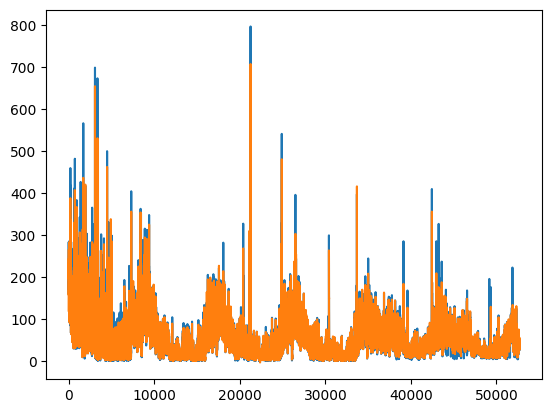

In [49]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.944452239190486


In [51]:
import joblib
joblib.dump(model, 'Odisha_PM2.5_µgm³.pkl')

['Odisha_PM2.5_µgm³.pkl']

In [52]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
pred_check2 = model.predict(X)

In [54]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9146724050407077


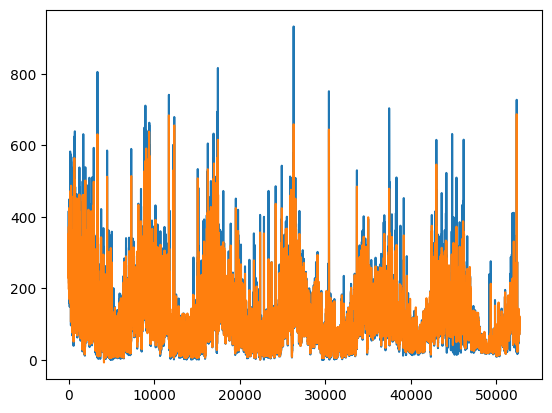

In [55]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [56]:
joblib.dump(model, 'Odisha_PM10_µgm³.pkl')

['Odisha_PM10_µgm³.pkl']